##Tanish Chhabra
###101916038
###CS10

##Importing dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/USA_Housing.csv')

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


##Checking for missing values and dependent features 

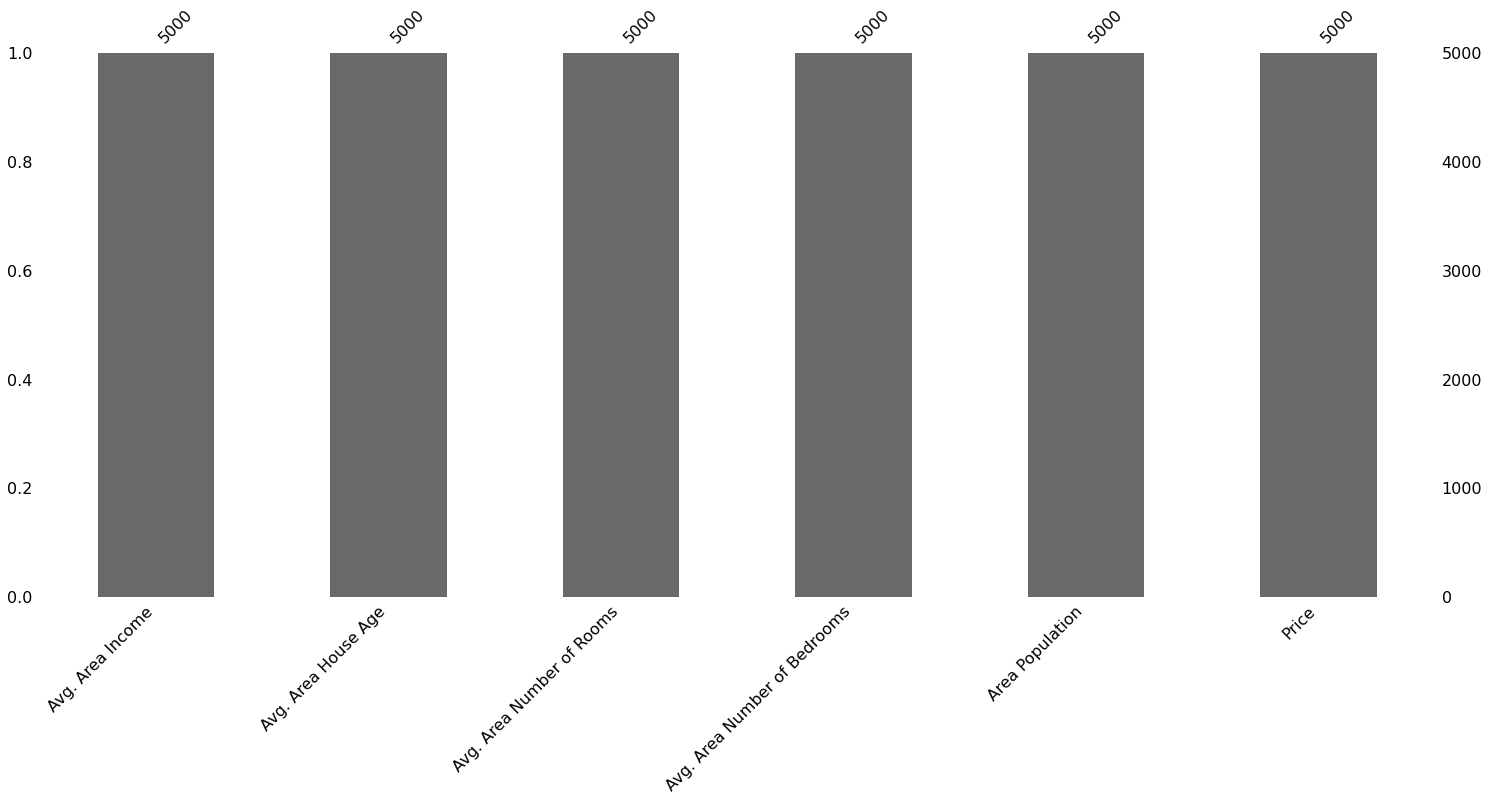

In [ ]:
import missingno as msn
msn.bar(df)

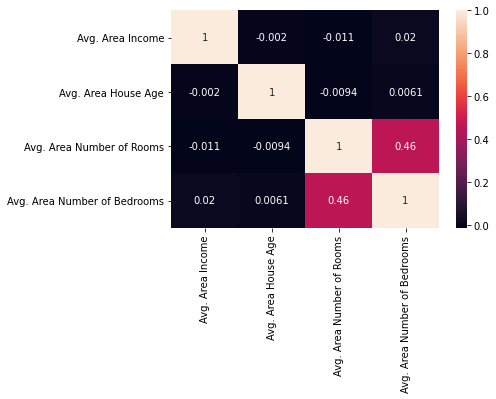

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:,:4].corr(),annot=True)

##Dviding dataset into X(input variables) and Y(output variables)

In [ ]:
X = df.iloc[:,:5]
Y = df.iloc[:,5]

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

##Scaling Input variables

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x = np.insert(X_scaled,0,1,axis=1)
x

array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462915, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

##Dividing input and output features into 5 folds

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [ ]:
i = 1
beta = []
r2 = -1

for train_index, test_index in kf.split(df):
  print("Iteration: ",i)
  i += 1

  x_train, x_test, y_train, y_test = x[train_index], x[test_index], Y[train_index], Y[test_index]

  a = x_train.T.dot(x_train)
  b = np.linalg.inv(a)
  c = b.dot(x_train.T)
  beta_temp = c.dot(y_train)
  print("Beta: ",beta_temp)

  #Predicting Y
  y_predicted = x_test.dot(beta_temp)
  
  #Calculating error, sse, mse, rmse
  error = y_predicted - y_test
  sse = np.sum(error**2)
  mse = sse/len(y_test)
  rmse = np.sqrt(mse)
  print("SSE:",sse,",MSE:",mse,",RMSE:",rmse)

  #Calculating R2
  y_mean = np.mean(y_test)
  total_variance = np.sum((y_test-y_mean)**2)
  r2_temp = 1-sse/total_variance  
  print("R2 score:",r2_temp)

  #Optimised R2
  if r2_temp >= r2:
    r2 = r2_temp
    beta = beta_temp
  print("\n")


Iteration:  1
Beta:  [1231872.07704612  229923.70318635  164052.98579011  120923.57426579
    3533.77470973  151855.58542488]
SSE: 10087104444118.812 ,MSE: 10087104444.118813 ,RMSE: 100434.57793070478
R2 score: 0.9175899480765107


Iteration:  2
Beta:  [1232586.40453402  228365.32287054  165201.14881927  122539.46855211
    1697.03433458  150055.81710562]
SSE: 10728109153419.219 ,MSE: 10728109153.419218 ,RMSE: 103576.58593243561
R2 score: 0.920301549640113


Iteration:  3
Beta:  [1231448.09063371  230730.20810582  163554.55706976  121669.08713233
    2620.25215054  150923.12489298]
SSE: 9861616305461.945 ,MSE: 9861616305.461945 ,RMSE: 99305.67106395256
R2 score: 0.9152429915320014


Iteration:  4
Beta:  [1.23144707e+06 2.29921558e+05 1.64523054e+05 1.19737507e+05
 1.12425659e+03 1.51317802e+05]
SSE: 10176314743926.215 ,MSE: 10176314743.926214 ,RMSE: 100877.72174234614
R2 score: 0.9208503836977656


Iteration:  5
Beta:  [1233028.38536436  230778.59921985  163755.13607252  121885.1351222

In [ ]:
print("Max R2 score:",r2,"\n")
print("Corresponding Beta matrix:",beta)

Max R2 score: 0.9208503836977656 

Corresponding Beta matrix: [1.23144707e+06 2.29921558e+05 1.64523054e+05 1.19737507e+05
 1.12425659e+03 1.51317802e+05]


##Testing 30% data with optimal value of beta

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.30,random_state=42)

In [ ]:
#Predicting Y
y_predicted = x_test.dot(beta)
y_predicted

array([1311140.69940349, 1239714.65171282, 1247104.84608317, ...,
       1458274.88354635, 1484711.44763548, 1047635.36214689])

In [ ]:
#Calculating error,sse,mse,rmse and R2 score
error = y_predicted - y_test
sse = np.sum(error**2)
mse = sse/len(y_test)
rmse = np.sqrt(mse)
print("SSE:",sse,"\nMSE:",mse,"\nRMSE:",rmse)

y_mean = np.mean(y_test)
total_variance = np.sum((y_test-y_mean)**2)
r2_temp = 1-sse/total_variance  
print("R2 score:",r2_temp)


SSE: 15101749043647.363 
MSE: 10067832695.76491 
RMSE: 100338.59026199696
R2 score: 0.9146868482147402
